# 1、导入包

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 2、读取数据

In [3]:
terrorism_data = pd.read_excel("附件1.xlsx",sheet_name='Data')

In [4]:
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,199801010001,1998,1,1,NaN,0,NaT,34,Burundi,11,...,NaN,"“Burundi Rebels, Ex-Rwandan Army Soldiers Blam...",“Burundi--Attack Reported on Bujumbura Airport...,NaN,CETIS,0,1,0,1,NaN
1,199801010002,1998,1,1,NaN,0,NaT,167,Russia,9,...,NaN,"“Bomb injures 3 in Moscow subway system,” The ...","“Bomb injures 3 in Moscow subway,” Charleston ...","“Bomb Injures 3 Workers in Moscow Metro,” Los ...",CETIS,-9,-9,0,-9,NaN
2,199801010003,1998,1,1,NaN,0,NaT,603,United Kingdom,8,...,NaN,“Protestant gunmen kill Catholic in New Year's...,“Ulster Peace Shattered by Shooting: Catholic ...,NaN,CETIS,0,0,1,1,NaN
3,199801020001,1998,1,2,NaN,0,NaT,95,Iraq,10,...,NaN,“Iraq Condemns Attack on UNSCOM Baghdad Office...,"Farouk Choukri , “Iraq, UN Officials Continue ...","“Iraqi Interior Minister on UNSCOM Attack, Kuw...",CETIS,-9,-9,1,1,NaN
4,199801020002,1998,1,2,NaN,0,NaT,155,West Bank and Gaza Strip,10,...,NaN,"“Woman Shot,” The Philadelphia Inquirer, Janua...",“Israeli Woman Critically Hurt by Gunfire in W...,NaN,CETIS,-9,-9,0,-9,NaN


In [5]:
terrorism_data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

# 3、特征选取

In [6]:
data_columns = [
                ## 二元变量: 
                'extended' , 'crit1', 'crit2', 'crit3', 'doubtterr',
                'multiple', 'success', 'suicide', 'guncertain1',
                'claimed', 'property', 'ishostkid',
                 #财产损失程度
                'propextent',      
                ## 数值变量:
                'nkill', 'nwound','nperps','nkillter','nwoundte','propvalue','nhostkid','nreleased','ransom',       
                ## 分类变量: 
                'region', 'attacktype1', 'targtype1',
                'natlty1', 'weaptype1', 'hostkidoutcome'
              ]
# data_columns = [
#                 'weaptype1','region','success','attacktype1','targtype1','nkill','nwound','suicide','nkillter','nwoundte', 'propextent','nperps'
#               ]

In [7]:
data = terrorism_data.copy()
df = data.loc[:,data_columns]
df.head()

,extended,crit1,crit2,crit3,doubtterr,multiple,success,suicide,guncertain1,claimed,...,propvalue,nhostkid,nreleased,ransom,region,attacktype1,targtype1,natlty1,weaptype1,hostkidoutcome
0,0,1,1,1,1.0,0.0,1,0,0.0,0,...,NaN,NaN,NaN,NaN,11,2,4,34.0,5,NaN
1,0,1,1,1,0.0,0.0,1,0,0.0,0,...,NaN,NaN,NaN,NaN,9,3,19,167.0,6,NaN
2,0,1,1,1,0.0,0.0,1,0,0.0,1,...,NaN,NaN,NaN,NaN,8,2,14,233.0,5,NaN
3,0,1,1,1,0.0,0.0,1,0,0.0,0,...,NaN,NaN,NaN,NaN,10,3,7,999.0,6,NaN
4,0,1,1,1,0.0,0.0,0,0,0.0,0,...,NaN,NaN,NaN,NaN,10,2,14,97.0,5,NaN


# 4、数据预处理

## 4.1缺失数据统计

D:\anaconda3\envs\pytorch\lib\site-packages\missingno\missingno.py:258: RuntimeWarning: overflow encountered in long_scalars
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)
D:\anaconda3\envs\pytorch\lib\site-packages\missingno\missingno.py:265: RuntimeWarning: overflow encountered in long_scalars
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<AxesSubplot:>

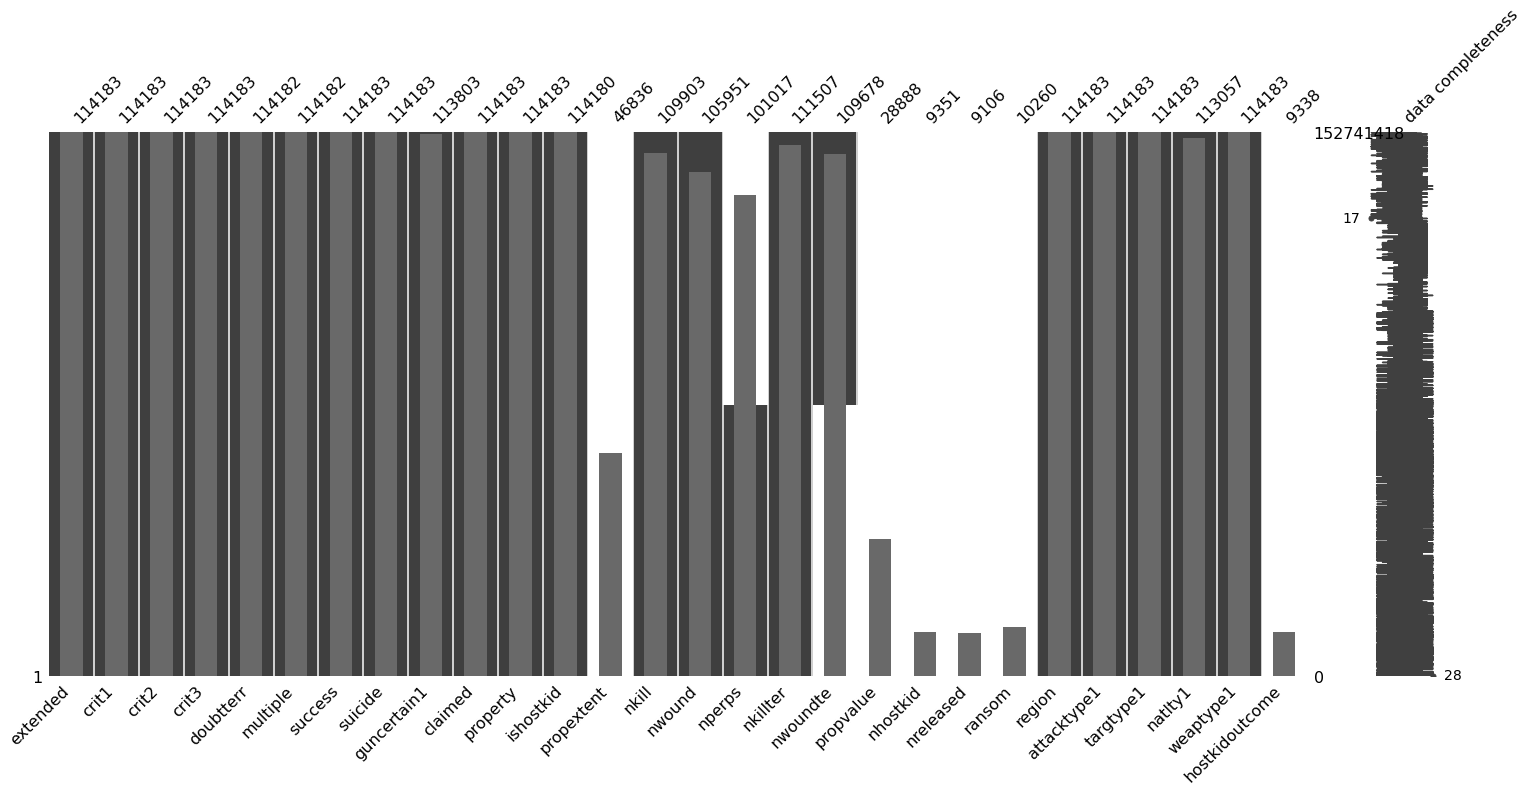

In [8]:
import missingno as msno
msno.matrix(df, labels=True)
df.isnull().sum()/df.shape[0]
msno.bar(df)

## 4.2 缺失值处理

In [9]:
df["nhostkidisnull"] = df["nhostkid"].isnull()
df["nhostkidisnull"] = df["nhostkidisnull"].astype('int')
df["ransomisnull"] = df["ransom"].isnull()
df["ransomisnull"] = df["ransomisnull"].astype(int)
df["hostkidoutcomeisnull"] = df["hostkidoutcome"].isnull()
df["hostkidoutcomeisnull"] = df["hostkidoutcomeisnull"].astype(int)
df["nreleasedisnull"] = df["nreleased"].isnull()
df["nreleasedisnull"] = df["nreleasedisnull"].astype(int)
df = df.drop(['nhostkid','ransom','hostkidoutcome','nreleased'],axis=1)

## 4.3 采用0替换未知值-9,-99

In [10]:
#把未知的-9,-99替换成0
df[['claimed','property','ishostkid','propvalue','nperps']] = df.loc[:,['claimed','property','ishostkid','propvalue','nperps']].replace(-9,0)
df[['nperps','propvalue']] = df.loc[:,['nperps','propvalue']].replace(-99,0)
df = df.fillna(df.mean())
df.head(10)

,extended,crit1,crit2,crit3,doubtterr,multiple,success,suicide,guncertain1,claimed,...,propvalue,region,attacktype1,targtype1,natlty1,weaptype1,nhostkidisnull,ransomisnull,hostkidoutcomeisnull,nreleasedisnull
0,0,1,1,1,1.0,0.0,1,0,0.0,0,...,37661.190113,11,2,4,34.0,5,1,1,1,1
1,0,1,1,1,0.0,0.0,1,0,0.0,0,...,37661.190113,9,3,19,167.0,6,1,1,1,1
2,0,1,1,1,0.0,0.0,1,0,0.0,1,...,37661.190113,8,2,14,233.0,5,1,1,1,1
3,0,1,1,1,0.0,0.0,1,0,0.0,0,...,37661.190113,10,3,7,999.0,6,1,1,1,1
4,0,1,1,1,0.0,0.0,0,0,0.0,0,...,37661.190113,10,2,14,97.0,5,1,1,1,1
5,0,1,1,1,0.0,1.0,1,0,1.0,1,...,37661.190113,9,3,3,118.0,6,1,1,1,1
6,0,1,1,1,0.0,1.0,1,0,1.0,1,...,37661.190113,9,3,3,118.0,6,1,1,1,1
7,0,1,1,1,0.0,0.0,0,0,0.0,0,...,37661.190113,8,3,3,15.0,6,1,1,1,1
8,0,1,1,1,0.0,1.0,1,0,0.0,0,...,37661.190113,3,3,10,86.0,6,1,1,1,1
9,0,1,1,1,0.0,1.0,1,0,0.0,0,...,37661.190113,11,2,14,168.0,5,1,1,1,1


## 4.4 缺失值插补

In [12]:
df.head()
df.shape
df.isnull().sum()
df.describe()

,extended,crit1,crit2,crit3,doubtterr,multiple,success,suicide,guncertain1,claimed,...,propvalue,region,attacktype1,targtype1,natlty1,weaptype1,nhostkidisnull,ransomisnull,hostkidoutcomeisnull,nreleasedisnull
count,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,...,1.141830e+05,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000
mean,0.060736,0.989324,0.995586,0.878791,0.161777,0.157958,0.873869,0.057198,0.104057,0.163378,...,3.766119e+04,8.024548,3.343168,8.752310,127.688838,6.391179,0.918105,0.910144,0.918219,0.920251
std,0.238846,0.102771,0.066291,0.326371,0.368246,0.364702,0.331998,0.232221,0.304827,0.369712,...,1.173638e+06,2.370121,1.860464,6.527255,95.804500,2.070908,0.274206,0.285976,0.274032,0.270906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.154510e+03,6.000000,2.000000,3.000000,92.000000,5.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.766119e+04,9.000000,3.000000,4.000000,97.000000,6.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.766119e+04,10.000000,3.000000,14.000000,160.000000,6.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.500000e+08,12.000000,9.000000,22.000000,1004.000000,13.000000,1.000000,1.000000,1.000000,1.000000


## 4.5 标准化

In [13]:
df_norm2 = (df-df.mean())/df.std()     
df_norm2

,extended,crit1,crit2,crit3,doubtterr,multiple,success,suicide,guncertain1,claimed,...,propvalue,region,attacktype1,targtype1,natlty1,weaptype1,nhostkidisnull,ransomisnull,hostkidoutcomeisnull,nreleasedisnull
0,-0.254289,0.10388,0.066585,0.371383,2.276259,-0.433116,0.379914,-0.246307,-0.341364,-0.441906,...,6.199490e-18,1.255401,-0.721953,-0.728072,-0.977917,-0.671773,0.298662,0.314207,0.298436,0.29438
1,-0.254289,0.10388,0.066585,0.371383,-0.439317,-0.433116,0.379914,-0.246307,-0.341364,-0.441906,...,6.199490e-18,0.411562,-0.184453,1.569985,0.410327,-0.188893,0.298662,0.314207,0.298436,0.29438
2,-0.254289,0.10388,0.066585,0.371383,-0.439317,-0.433116,0.379914,-0.246307,-0.341364,2.262902,...,6.199490e-18,-0.010357,-0.721953,0.803966,1.099230,-0.671773,0.298662,0.314207,0.298436,0.29438
3,-0.254289,0.10388,0.066585,0.371383,-0.439317,-0.433116,0.379914,-0.246307,-0.341364,-0.441906,...,6.199490e-18,0.833481,-0.184453,-0.268460,9.094679,-0.188893,0.298662,0.314207,0.298436,0.29438
4,-0.254289,0.10388,0.066585,0.371383,-0.439317,-0.433116,-2.632150,-0.246307,-0.341364,-0.441906,...,6.199490e-18,0.833481,-0.721953,0.803966,-0.320328,-0.671773,0.298662,0.314207,0.298436,0.29438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114178,-0.254289,0.10388,0.066585,-2.692611,2.276259,-0.433116,0.379914,-0.246307,-0.341364,2.262902,...,6.199490e-18,1.255401,-0.721953,-0.728072,0.566896,-0.671773,0.298662,0.314207,0.298436,0.29438
114179,-0.254289,0.10388,0.066585,-2.692611,2.276259,-0.433116,0.379914,-0.246307,-0.341364,-0.441906,...,-3.208927e-02,0.833481,-0.184453,-0.728072,0.410327,-0.188893,0.298662,0.314207,0.298436,0.29438
114180,-0.254289,0.10388,0.066585,0.371383,-0.439317,-0.433116,0.379914,-0.246307,-0.341364,-0.441906,...,-3.208927e-02,-1.276116,1.965548,0.803966,0.337261,0.776868,0.298662,0.314207,0.298436,0.29438
114181,-0.254289,0.10388,0.066585,0.371383,-0.439317,-0.433116,-2.632150,-0.246307,-0.341364,-0.441906,...,6.199490e-18,-0.854196,-0.184453,-1.034479,-0.372517,-0.188893,0.298662,0.314207,0.298436,0.29438


# 5、因子分析降维

In [32]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyze import Factor_analyzer
import numpy as np
from sklearn import preprocessing
from matplotlib import cm
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.5)

- 熵权法

In [34]:
import math
def get_entropy_weight(data):
    """
    :param data: 评价指标数据框
    :return: 各指标权重列表
    """ 
    data = pd.DataFrame(data)
    data = data.apply(lambda data: ((data - np.min(data)) / (np.max(data) - np.min(data))))
    #计算k
    m,n=data.shape   #m是行，n是列
    yij=np.array(data.sum(axis=0))  
    data = np.array(data)
    #计算pij
    pij=np.array(data/yij)
    a=pij*1.0
    a[np.where(pij==0)]=0.0001
#    #计算每个指标的熵
    e=(-1.0/np.log(n))*np.sum(pij*np.log(a),axis=0)
    w=(1-e)/np.sum(1-e)
    recodes=np.sum(data*w,axis=1)
    return recodes

- 因子分析法


原始数据:
         extended  crit1  crit2  crit3  doubtterr  multiple  success  suicide  \
0              0      1      1      1        1.0       0.0        1        0   
1              0      1      1      1        0.0       0.0        1        0   
2              0      1      1      1        0.0       0.0        1        0   
3              0      1      1      1        0.0       0.0        1        0   
4              0      1      1      1        0.0       0.0        0        0   
...          ...    ...    ...    ...        ...       ...      ...      ...   
114178         0      1      1      0        1.0       0.0        1        0   
114179         0      1      1      0        1.0       0.0        1        0   
114180         0      1      1      1        0.0       0.0        1        0   
114181         0      1      1      1        0.0       0.0        0        0   
114182         0      1      1      1        0.0       0.0        0        0   

        guncertain1  claimed  .

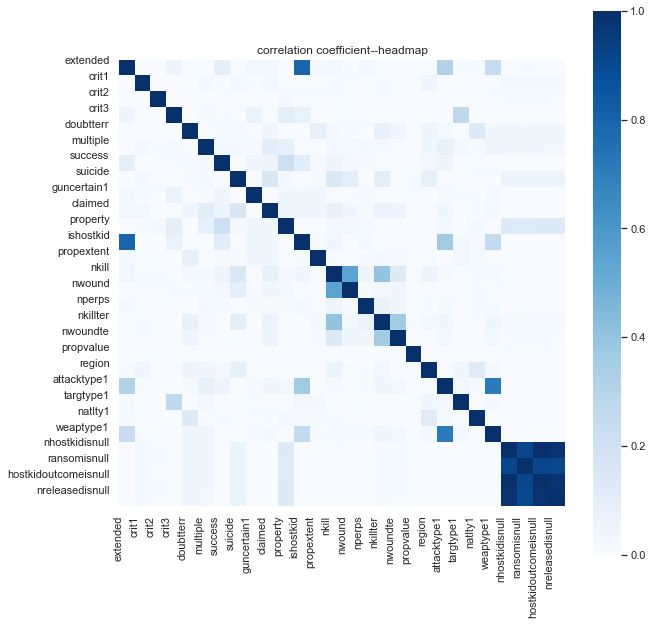

D:\anaconda3\envs\pytorch\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '



KMO测度: 0.8057508874161082

KMO测度大于0.6，适合做因子分析

巴特利特球形检验: 0.0

巴特利特球形检验的伴随概率小于0.05，适合做因子分析

特征值: [7.38478752e+00 2.95009433e+00 2.20453761e+00 1.59718415e+00
 1.45852666e+00 1.35062522e+00 1.19848015e+00 1.12727757e+00
 1.06936844e+00 1.02289472e+00 9.78191113e-01 9.36977146e-01
 8.32253241e-01 8.25491683e-01 7.65210668e-01 5.52536987e-01
 4.70239522e-01 4.27500008e-01 3.93484756e-01 3.10626558e-01
 8.32210439e-02 3.65862563e-02 1.85332799e-02 3.18821647e-03
 2.10605319e-03 7.69024539e-05 1.90819666e-07 3.08907604e-16]

特征向量 [ 7.38206327e+00  2.94559949e+00  2.19977764e+00  1.59219961e+00
  1.45354900e+00  1.34565214e+00  1.19354907e+00  1.12231732e+00
  1.06439316e+00  1.01795752e+00  9.73229164e-01  9.32037999e-01
  8.27314197e-01  8.20519773e-01  7.60228146e-01  5.47570598e-01
  4.65650520e-01  4.22569822e-01  3.88538753e-01  3.05720434e-01
  7.82246495e-02  3.15917335e-02  1.41976740e-02  2.28660906e-04
 -1.06835684e-03 -1.15200161e-03 -1.15350494e-03 -1.67784892e-03]

============

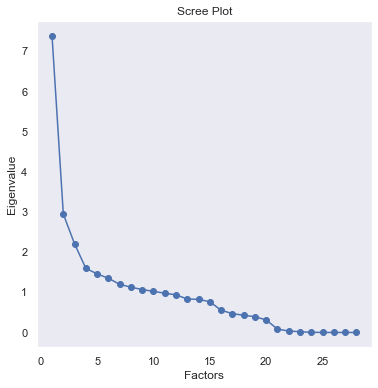

由碎石图可知有10个因子的特征值大于1，所以选择10个因子重新进行因子分析

旋转后的因子荷载矩阵 [[-9.77828985e-01 -6.68280424e-03  3.76412943e-03  1.34563745e-02
   8.39617612e-02 -7.37743635e-02 -2.52904209e-02  1.89594568e-02
   1.79236145e-03 -2.41691150e-02]
 [ 4.38754281e-02 -2.66284336e-01 -2.87053494e-02 -2.60151982e-02
   1.33991434e-02 -3.56401784e-02  3.78170695e-02 -7.42068651e-02
  -2.35176386e-02  7.64123585e-02]
 [ 1.97843484e-02 -1.78111971e-01 -4.73403131e-02 -3.58030916e-02
  -3.82971467e-02 -1.51085610e-02 -3.34510808e-02 -2.08440896e-01
  -8.73892747e-03 -3.00635491e-02]
 [-1.44180914e-01 -8.13516498e-01  1.00086908e-03 -1.15007040e-01
  -7.45573606e-02  2.01193093e-01 -1.11045150e-01  2.82074792e-01
   1.02201430e-02 -1.46121213e-01]
 [ 1.02295361e-01  9.82087065e-01  5.88275418e-03  1.02053295e-01
   4.99183764e-02 -1.64905351e-01  7.88792482e-02 -1.37662788e-01
  -1.48699282e-03  7.84407826e-02]
 [ 4.23959236e-02 -5.03612093e-02 -5.50221704e-02 -6.32239647e-02
   8.16242389e-02  1.19790130e-01  1.67982250e-01

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
4968,200107240001,2001,7,24,NaN,0,NaT,186,Sri Lanka,6,...,NaN,"Peter Foster, Richard Allyne, Vilma Wimaladasa...","""Tamil Tigers hit Sri Lanka airport; Suicide b...","""Attack on airbase, airport leaves 14 dead, 13...",CETIS,0,1,1,1,NaN
5619,200109110004,2001,9,11,NaN,0,NaT,217,United States,1,...,This attack was one of four related incidents ...,"United States Government, The 9/11 Commission ...","Lindsay Kines, “United States on high alert af...","Joe Frolick, “Hijackers Ram Two Airliners Into...",CETIS,0,1,0,1,"200109110004, 200109110005, 200109110006, 2001..."
5620,200109110005,2001,9,11,NaN,0,NaT,217,United States,1,...,This attack was one of four related incidents ...,"United States Government, The 9/11 Commission ...","Lindsay Kines, “United States on high alert af...","Joe Frolick, “Hijackers Ram Two Airliners Into...",CETIS,0,1,0,1,"200109110005, 200109110004, 200109110006, 2001..."
8840,200403210001,2004,3,21,NaN,0,NaT,141,Nepal,6,...,The Agence France Presse reported that there w...,"Kedar Man Sing, “2 Deadly clashes in Nepal as ...",“AFP: Clashes in Nepal Reportedly Leave 500 Ma...,NaN,CETIS,0,0,0,0,NaN
69238,201408200027,2014,8,19,NaN,1,NaT,200,Syria,10,...,NaN,"""IS 'kills dozens of Syrian soldiers',"" BBC, A...","""Islamic State group seizes Syrian air base,"" ...","""IS steps up attack on last Syria army bas...",START Primary Collection,0,1,0,1,NaN
66010,201406150063,2014,6,12,NaN,1,NaT,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""Iraq exhumes 470 bodies of 'ISIL massacre vic...","""Scene of Iraqi Massacre Becomes Shiite Pilgri...","""Iraq Empties Mass Graves in Search for Cadets...",START Primary Collection,0,1,0,1,NaN
102690,201612100011,2016,12,10,NaN,1,NaT,200,Syria,10,...,NaN,"""IS Kills 12 People in Historic Syrian City of...","""Russian military explain how Palmyra was reta...","""Islamic State militants return to Syria's anc...",START Primary Collection,0,1,0,1,NaN
82,199802010001,1998,2,1,NaN,0,NaT,186,Sri Lanka,6,...,NaN,“300 rebels reported killed in Sri Lanka: 'Rin...,"“Asia: Heavy Fighting Grips Sri Lanka, Toll hi...","“Asia: Sri Lankan Army Claims 220 Rebels Dead,...",CETIS,0,0,0,0,NaN
91580,201602180049,2016,2,17,NaN,0,NaT,209,Turkey,10,...,NaN,"""PKK attack on oil pipeline cost KRG $100mn: S...","""BRIEF: Oil pipeline blown up in Turkey [Trend...",NaN,START Primary Collection,0,0,0,0,NaN
73834,201412070129,2014,12,7,NaN,0,NaT,217,United States,1,...,NaN,"""Man Convicted of Starting Massive Da Vinci Fi...","""Man Pleads Guilty, Gets 15 Years In Prison Fo...","""Man accused of Da Vinci apartment arson was a...",START Primary Collection,-9,-9,0,-9,NaN


In [39]:
def Factor_analyzer(data):
    """
    :param data: 原始数据
    :return: 所有样本的综合得分，前十大恐怖事件ID
    """ 
    print("\n原始数据:\n",data)
    #归一化
    data = (data-data.mean())/data.std()  
    print("\n归一化之后的数据:\n",pd.DataFrame(data))
    # 皮尔森相关系数
    data_corr=data.corr()
    print("\n相关系数:\n",pd.DataFrame(data_corr))
    #热力图
    cmap = cm.Blues
    sns.set()
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(data=data_corr,square=True,cmap=cmap, vmin=0, vmax=1) 
    plt.title('correlation coefficient--headmap')
    ax.set_yticks(range(len(data_corr.columns)))
    ax.set_yticklabels(data_corr.columns)
    ax.set_xticks(range(len(data_corr)))
    ax.set_xticklabels(data_corr.columns)
    plt.show()
    # KMO测度,0.9以上非常好；0.8以上好；0.7一般；0.6差；0.5很差；0.5以下不能接受；
    kmo_all,kmo_model=calculate_kmo(data)
    print("\nKMO测度:", kmo_model)
    if kmo_model < 0.6:
        print("\nKMO测度不足0.6，不适合做因子分析")
    else:
        print("\nKMO测度大于0.6，适合做因子分析")
    #Bartlett's球状检验,用来判断变量是否适合用于做因子分析
    #Bartlett球度统计量越大越好，其伴随概率<0.05，说明数据适合做因子分析
    chi_square_value,p_value=calculate_bartlett_sphericity(data)
    print("\n巴特利特球形检验:",p_value)
    if p_value > 0.05:
        print("\n巴特利特球形检验的伴随概率大于0.05，不适合做因子分析")
    else:
        print("\n巴特利特球形检验的伴随概率小于0.05，适合做因子分析")
     # 求特征值和特征向量
    fa = FactorAnalyzer(n_factors = 25,rotation=None)
    fa.fit(data_corr)
    ev, v = fa.get_eigenvalues()
    print("\n特征值:",ev)
    print("\n特征向量",v)
    #绘制碎石图，选取特征值大于1的因子
    print("\n=================绘制碎石图==================")
    plt.figure(figsize=(6, 6))
    plt.scatter(range(1,data.shape[1]+1),ev)
    plt.plot(range(1,data.shape[1]+1),ev)
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid()
    plt.show()
    m = 0
    for i in range(len(ev)):
        if ev[i] > 1:
            m = m+1;
        else:
            break;
    print("由碎石图可知有" + str(m) +"个因子的特征值大于1，所以选择" + str(m) +"个因子重新进行因子分析")
    #根据选择的因子数重新执行因子分析
    #使用最大方差法旋转因子载荷矩阵
    fa = FactorAnalyzer(n_factors = m,rotation='varimax')
    fa.fit(data_corr)
    load = fa.loadings_
    #旋转后的因子的载荷矩阵
    print("\n旋转后的因子荷载矩阵",load)
    fa_var = fa.get_factor_variance()
    fa_df = pd.DataFrame(
        {'特征值': fa_var[0], '方差贡献率': fa_var[1], '方差累计贡献率': fa_var[2]})
    print(fa_df)
     # 因子得分（回归方法）（系数矩阵的逆乘以因子载荷矩阵）
    print("\n==========以下采用回归方法计算因子得分============")
    X1 = np.mat(data_corr)
    X1 = np.linalg.inv(X1)
    factor_score = np.dot(X1,load)
    factor_score = pd.DataFrame(factor_score)
    tmp_columns = []
    for index in range(m):
       tmp = "factor" + str(index + 1)
       tmp_columns.append(tmp)
    factor_score.columns = tmp_columns
    print("\n因子得分",factor_score)
    print("\n==============采用熵权法计算各个因子的权重===============")
    fa_t_score = np.dot(np.mat(data), np.mat(factor_score))
    w = get_entropy_weight(fa_t_score.T)
    print("\n熵权法求得的权重为：\n",w)
    fa_t_score = np.dot(fa_t_score,w)
    fa_t_score = pd.DataFrame(fa_t_score.T)
    print("\n各个样本得分如下：\n",fa_t_score)
    fa_t_score.columns = ['综合得分']
    fa_t_score.insert(0, 'ID', range(0, data.shape[0]))
    top10 = fa_t_score.sort_values(by='综合得分', ascending=False).head(10)
    index = top10.ID
    print("\n前十大事件综合得分：\n", fa_t_score.sort_values(by='综合得分', ascending=False).head(10))
    return fa_t_score,index
fa_t_score,index = Factor_analyzer(df)
terrorism_data.iloc[index,:]

# 6、PCA降维


原始数据:
         extended  crit1  crit2  crit3  doubtterr  multiple  success  suicide  \
0              0      1      1      1        1.0       0.0        1        0   
1              0      1      1      1        0.0       0.0        1        0   
2              0      1      1      1        0.0       0.0        1        0   
3              0      1      1      1        0.0       0.0        1        0   
4              0      1      1      1        0.0       0.0        0        0   
...          ...    ...    ...    ...        ...       ...      ...      ...   
114178         0      1      1      0        1.0       0.0        1        0   
114179         0      1      1      0        1.0       0.0        1        0   
114180         0      1      1      1        0.0       0.0        1        0   
114181         0      1      1      1        0.0       0.0        0        0   
114182         0      1      1      1        0.0       0.0        0        0   

        guncertain1  claimed  .

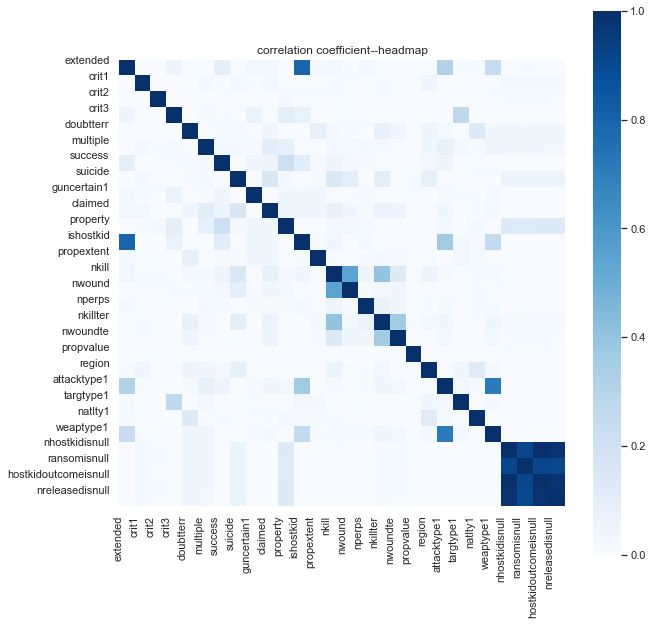


选择累计贡献率大于等于0.95的因子
         特征值     方差贡献率   方差累计贡献率
0   5.849536  0.208912  0.208912
1   2.157024  0.077037  0.285949
2   1.829865  0.065352  0.351301
3   1.494630  0.053380  0.404681
4   1.342591  0.047950  0.452630
5   1.236764  0.044170  0.496800
6   1.190395  0.042514  0.539314
7   1.092575  0.039021  0.578335
8   1.078086  0.038503  0.616838
9   1.053093  0.037610  0.654449
10  1.005514  0.035911  0.690360
11  0.990792  0.035385  0.725745
12  0.970863  0.034674  0.760419
13  0.929197  0.033186  0.793604
14  0.920482  0.032874  0.826479
15  0.880549  0.031448  0.857927
16  0.761612  0.027200  0.885127
17  0.726176  0.025935  0.911062
18  0.672632  0.024023  0.935085
19  0.657019  0.023465  0.958550

成分得分系数矩阵: 
           0         1         2         3         4         5         6   \
0   0.143831  0.004822 -0.003061  0.050269 -0.003894  0.009369 -0.023761   
1  -0.003954 -0.055118  0.075587 -0.063373  0.013016 -0.070408 -0.336508   
2  -0.002323 -0.037687  0.018743  0.021974 -0.

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
4968,200107240001,2001,7,24,NaN,0,NaT,186,Sri Lanka,6,...,NaN,"Peter Foster, Richard Allyne, Vilma Wimaladasa...","""Tamil Tigers hit Sri Lanka airport; Suicide b...","""Attack on airbase, airport leaves 14 dead, 13...",CETIS,0,1,1,1,NaN
5619,200109110004,2001,9,11,NaN,0,NaT,217,United States,1,...,This attack was one of four related incidents ...,"United States Government, The 9/11 Commission ...","Lindsay Kines, “United States on high alert af...","Joe Frolick, “Hijackers Ram Two Airliners Into...",CETIS,0,1,0,1,"200109110004, 200109110005, 200109110006, 2001..."
5620,200109110005,2001,9,11,NaN,0,NaT,217,United States,1,...,This attack was one of four related incidents ...,"United States Government, The 9/11 Commission ...","Lindsay Kines, “United States on high alert af...","Joe Frolick, “Hijackers Ram Two Airliners Into...",CETIS,0,1,0,1,"200109110005, 200109110004, 200109110006, 2001..."
8840,200403210001,2004,3,21,NaN,0,NaT,141,Nepal,6,...,The Agence France Presse reported that there w...,"Kedar Man Sing, “2 Deadly clashes in Nepal as ...",“AFP: Clashes in Nepal Reportedly Leave 500 Ma...,NaN,CETIS,0,0,0,0,NaN
91580,201602180049,2016,2,17,NaN,0,NaT,209,Turkey,10,...,NaN,"""PKK attack on oil pipeline cost KRG $100mn: S...","""BRIEF: Oil pipeline blown up in Turkey [Trend...",NaN,START Primary Collection,0,0,0,0,NaN
73834,201412070129,2014,12,7,NaN,0,NaT,217,United States,1,...,NaN,"""Man Convicted of Starting Massive Da Vinci Fi...","""Man Pleads Guilty, Gets 15 Years In Prison Fo...","""Man accused of Da Vinci apartment arson was a...",START Primary Collection,-9,-9,0,-9,NaN
564,199808070002,1998,8,7,NaN,0,NaT,104,Kenya,11,...,NaN,"Laura Myers, “U.S. promises to hit back if any...","“Kenya; New Twist in bomb Tragedy,” Africa New...","“Blast toll tops 200,” Evening Herald (Plymout...",CETIS,0,1,1,1,"199808070002, 199808070003"
6285,200202150002,2002,2,15,NaN,0,NaT,45,Colombia,3,...,NaN,“Two Bombs in Riohacha Cause Property Damage W...,“Highlights: Colombian Guerrilla/Paramilitary ...,NaN,CETIS,-9,-9,0,-9,NaN
69379,201408230034,2014,8,23,NaN,0,NaT,200,Syria,10,...,Casualty numbers for this incident conflict ac...,"""Jihadists killed in new push to take Syria ai...","""Third ISIL Attempt to Seize Tabaqa Airport Fa...","""Syrian Army Inflict 'Heavy Losses' on ISIL at...",START Primary Collection,0,1,0,1,NaN
96079,201606120025,2016,6,12,NaN,0,NaT,110,Lebanon,10,...,Casualty numbers for this incident conflict ac...,"""CCTV footage holds clues to bombing,"" The Dai...","""Bomb explodes outside Lebanese Blom Bank in B...","""Lebanon's interior minister says Beirut blast...",START Primary Collection,0,1,0,1,NaN


In [43]:
from sklearn.decomposition import PCA
def pca_analyze(data):
    print("\n原始数据:\n",data)
    #归一化
    data = (data-data.mean())/data.std()  
    print("\n归一化之后的数据:\n",pd.DataFrame(data))
    # 皮尔森相关系数
    data_corr=data.corr()
    print("\n相关系数:\n",pd.DataFrame(data_corr))
    #热力图
    cmap = cm.Blues
    sns.set()
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(data=data_corr,square=True,cmap=cmap, vmin=0, vmax=1) 
    plt.title('correlation coefficient--headmap')
    ax.set_yticks(range(len(data_corr.columns)))
    ax.set_yticklabels(data_corr.columns)
    ax.set_xticks(range(len(data_corr)))
    ax.set_xticklabels(data_corr.columns)
    plt.show()
    #pca降维，选择解释度和为0.95的因子
    print("\n选择累计贡献率大于等于0.95的因子")
    pca = PCA(n_components=0.95)
    df_d = pca.fit_transform(data)
    df_ev = pca.explained_variance_
    df_evr = pca.explained_variance_ratio_
    df_evr_sum = np.cumsum(pca.explained_variance_ratio_)
    df_fa = pd.DataFrame(
            {'特征值': df_ev, '方差贡献率': df_evr,'方差累计贡献率': df_evr_sum})
    print(df_fa)
    k1_spss = pca.components_ / np.sqrt(pca.explained_variance_.reshape(-1, 1))  # 成分得分系数矩阵
    k1_spss = pd.DataFrame(k1_spss.T)
    print("\n成分得分系数矩阵: \n",k1_spss)
    tmp_columns = []
    for index in range(df_ev.shape[0]):
       tmp = "factor" + str(index + 1)
       tmp_columns.append(tmp)
    k1_spss.columns = tmp_columns
    print("\n主成分得分",k1_spss)
    print("\n==============采用熵权法计算各个因子的权重===============")
    fa_t_score = np.dot(np.mat(data), np.mat(k1_spss))
    w = get_entropy_weight(fa_t_score.T)
    print("\n熵权法求得的权重为：\n",w)
    fa_t_score = np.dot(fa_t_score,w)
    fa_t_score = pd.DataFrame(fa_t_score.T)
    print("\n各个样本得分如下：\n",fa_t_score)
    fa_t_score.columns = ['综合得分']
    fa_t_score.insert(0, 'ID', range(0, data.shape[0]))
    top10 = fa_t_score.sort_values(by='综合得分', ascending=False).head(10)
    index = top10.ID
    print("\n前十大事件综合得分：\n", fa_t_score.sort_values(by='综合得分', ascending=False).head(10))
    return fa_t_score,index
fa_t_score,index = pca_analyze(df)
terrorism_data.iloc[index,:]